# Python For Neuroscience
After installing 'Anaconda' following the instructions here: https://www.continuum.io/downloads
and after issuing in anaconda terminal 'jupyter notebook' you are ready to go. 

First, we import all the packages we are going to use:

In [1]:
# The %... is a Jupyter thing ("magic commands"), and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead on a separate window.
%matplotlib inline 

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np  # imports a fast numerical programming library
import pandas as pd # lets us handle data as dataframes


import matplotlib.pyplot as plt # sets up the plotting library under plt
import seaborn as sbs           # makes plot prettier 

/home/shiri/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/shiri/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Basic syntax and data structures

In [2]:
a = 5.0/6.0    # we define a variable 'a'
print(a)       # we print it
print type(a)  # we print it's type

0.833333333333
<type 'float'>


In [3]:
?type # type is an example of a function (with the input variable 'a'). use '?' to print it's documantaion.

### Lists
In a list, like in a MATLAB's cell, you can put variables from any kind. It is easy to manipulate numbers and strings with it.

In [4]:
alist = [1,2,3,4,5.0]                
asquaredlist = [i*i for i in alist]  # you can build one-line 'for' loop to run on it. ("list comprehensions")
asquaredlist

[1, 4, 9, 16, 25.0]

In [5]:
for i in range(10):                # and a 'regular' for loop
    asquaredlist.append(i)
asquaredlist.append('hello')
asquaredlist

[1, 4, 9, 16, 25.0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'hello']

### Dictionaries
lets you treat the variable like it's a database for storing and organizing data.

Keys are unique within a dictionary while values may not be. The values of a dictionary can be of any type, but the keys must be of an immutable data type such as strings, numbers. 

In [6]:
adict = {'one': 1, 'two': 2, 'three': 3}   # OR dict(one=1, two=2, three=3)
print adict.keys(), adict.values()
print [(k,v) for k,v in adict.items()]

['three', 'two', 'one'] [3, 2, 1]
[('three', 3), ('two', 2), ('one', 1)]


In [7]:
# Control flow:
if 'four' in adict.keys():
    print 'adict has four items'
elif 'three' in adict.keys():
    print 'adict has three items'
else:
    print 'adict is too small'   

adict has three items


### Functions
Unlike MATLAB, functions can be written in the same .py file together with a script. 

In [8]:
def square(x):
    return(x*x)

def cube(x):
    return x*x*x

square(5), cube(5)

(25, 125)

Python functions can have positional arguments and keyword arguments (like Matlab's nargin and varargin). 
Positional arguments are stored in a tuple, and keyword arguments in a dictionary:

In [9]:
def f(a, b, *posargs, **dictargs):
    print "got", a, b, posargs, dictargs
    return a

print f(1, 3)
print f(1, 3, 4, d=1, c=2)

got 1 3 () {}
1
got 1 3 (4,) {'c': 2, 'd': 1}
1


### Classes
Used to define objects in object-oriented environment. Pay attention to the following syntax:
* The \__init__ function defines the attributes when the instance is generetaed
* __self__ - addresses the class object
* when the functions inside class are defined (in this case they are called 'methods'), 'self' will always be the first input
* when we call a class method, the 'self' is already included in the input 

In [10]:
class Point():
    
    def __init__(self, x=0, y=0):  # x=0, y=0 denotes default variables.
        self.x = x
        self.y = y
    
    def coordinates(self):
        return (self.x,self.y)
    
    def calculate_distance(self, other_point):
        return np.sqrt(
        (self.x - other_point.x)**2 +
        (self.y - other_point.y)**2)

In [11]:
point1 = Point()           # create an instance of Point class (what is it coordinates?)
point2 = Point(1, 1)       # create another instance of Point class (what is it coordinates?)
point2 = Point(x=1, y=1)

In [12]:
print point1

<__main__.Point instance at 0x7f464c94a050>


In [13]:
#TODO: print point1.coordinates()
#TODO: print point2.coordinates()

In [14]:
print point1.calculate_distance(point2)
#print point2.calculate_distance(point1)

1.41421356237


# NumPy

Add-on library to python (comes with Anaconda). It was created to do numerical computing.  
Able to perform matrix and multidimensional array operations in linear algebra (equivalent to MATALB).

Tables for MATLAB-NumPy Equivalents can be found here: 
* https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html 
* http://mathesaurus.sourceforge.net/matlab-numpy.html  
* https://engineering.ucsb.edu/~shell/che210d/numpy.pdf

### Some examples:

In [15]:
A = np.arange(15).reshape(3, 5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [16]:
print A.shape # rows x columns
print A.ndim  # number of dimentions

(3, 5)
2


In [17]:
np.linspace(0, 2, 9) # create a vector of 9 elements from 0 to 2.

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

#### Basic matrix operations:

In [18]:
A = np.array( [[1,1],
               [0,1]] )
B = np.array( [[2,0],
               [3,4]] )
print A*B                # elementwise product (equivalent to MATLAB's A.*B)

[[2 0]
 [0 4]]


In [19]:
print A.dot(B)          # matrix product (equivalent to MATLAB's A*B)
print np.dot(A, B)      # another way to get matrix product

[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


#### Basic universal functions:

In [20]:
print np.exp(1)
print np.sqrt(4)
print np.mean([0,1,2])

2.71828182846
2.0
1.0


# Matplotlib

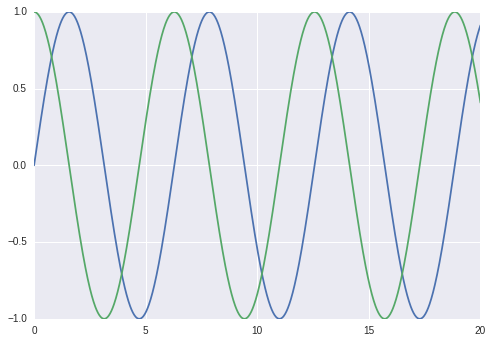

In [21]:
x = np.linspace(0, 20, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1)
plt.plot(x, y2);

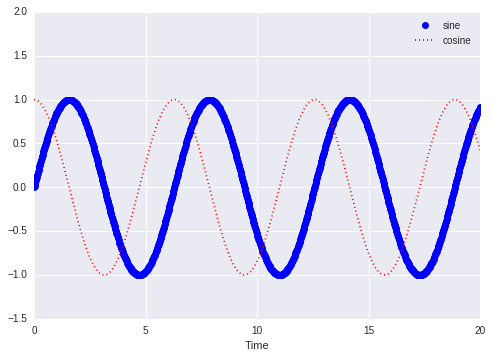

In [22]:
plt.plot(x, y1, 'ob', label='sine')
plt.plot(x, y2, ':r', label='cosine')
plt.legend(loc='upper right')
plt.ylim(-1.5, 2.0)
plt.xlabel('Time');

# Pandas

Used to handle datasets, provide easy-to-use data structures and data analysis tools.  
Pandas is well suited for tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet with row and column labels.

Key features:
* Easy handling of missing data
* Flexible group by functionality to perform split-apply-combine operations on data sets
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
* Merging and joining data sets
* Hierarchical labeling of axes
* IO tools for loading data from flat files, Excel files, databases, and HDF5
* Time series functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

You can find a cheetsheet here: https://drive.google.com/folderview?id=0ByIrJAE4KMTtaGhRcXkxNHhmY2M&usp=sharing

### Example - Movies ratings  

In [23]:
# we will load a movies csv file from the web

# we will define the column names in advance
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

# 'pd.read_csv' takes a csv file and creates a pandas dataframe object (similar to R's dataframe and MATLAB's table)
# 'sep' = what seperate the columns in the file
# 'names' = the columns names
# 'usecols' = how many columns to load (here only the first 5)
movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5))

# the 'head' function show us the first rows (defult number is 5)
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [24]:
print movies.dtypes
movies.describe()

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object


,movie_id,video_release_date
count,1682.000000,0.0
mean,841.500000,NaN
std,485.695893,NaN
min,1.000000,NaN
25%,421.250000,NaN
50%,841.500000,NaN
75%,1261.750000,NaN
max,1682.000000,NaN


### Selecting data

In [25]:
# selecting colums
columns_you_want = ['title', 'imdb_url'] 
movies[columns_you_want].head() 

,title,imdb_url
0,Toy Story (1995),http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,GoldenEye (1995),http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,Four Rooms (1995),http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,Get Shorty (1995),http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,Copycat (1995),http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [26]:
# selecting rows
movies.iloc[:2]

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...


### Filtering data

In [27]:
# We will load another csv file - this time of movies ratings by users
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', sep='\t', names=r_cols)
ratings.head() 

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [28]:
high_ratings = ratings[ratings.rating > 3]
high_ratings.head()

,user_id,movie_id,rating,unix_timestamp
5,298,474,4,884182806
7,253,465,5,891628467
11,286,1014,5,879781125
12,200,222,5,876042340
16,122,387,5,879270459


### Split-apply-combine
* splitting the data into groups based on some criteria
* applying a function to each group independently
* combining the results into a data structure

![title](http://i.imgur.com/yjNkiwL.png)

In [29]:
## split data
grouped_data = ratings['rating'].groupby(ratings['movie_id'])
## apply average and combine
average_ratings = grouped_data.mean()
print "Average ratings:"
print average_ratings.head()
print

Average ratings:
movie_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64



In [30]:
maximum_rating = average_ratings.max()
good_movie_ids = average_ratings[average_ratings == maximum_rating].index
print "Best movie titles"
print movies[movies.movie_id.isin(good_movie_ids)].title  # return the titles of the movies_ids 
                                                          # that are in good_movies_ids

Best movie titles
813                         Great Day in Harlem, A (1994)
1121                       They Made Me a Criminal (1939)
1188                                   Prefontaine (1997)
1200           Marlene Dietrich: Shadow and Light (1996) 
1292                                      Star Kid (1997)
1466                 Saint of Fort Washington, The (1993)
1499                            Santa with Muscles (1996)
1535                                 Aiqing wansui (1994)
1598                        Someone Else's America (1995)
1652    Entertaining Angels: The Dorothy Day Story (1996)
Name: title, dtype: object


### Plotting with Pandas

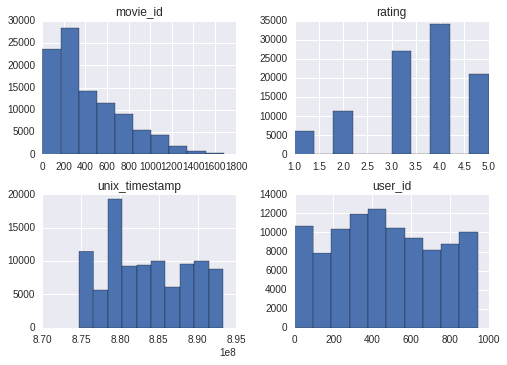

In [31]:
ratings.hist();

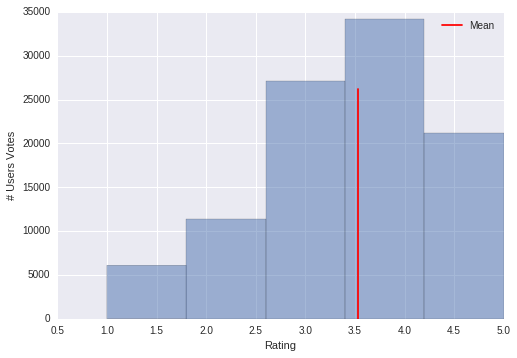

In [32]:
ratings['rating'].hist(bins=5, alpha=0.5)
plt.axvline(ratings['rating'].mean(), 0,0.75, color='r', label='Mean')
plt.xlabel("Rating")
plt.ylabel("# Users Votes")
plt.legend();

# MNE - EEG and MEG analysis
providing comprehensive tools, methods and workflows for (among other things):
* Preprocessing and denoising
* Source estimation
* Time–frequency analysis
* Statistical testing
* Estimation of functional connectivity
* Applying machine learning algorithms
* Visualization of sensor and source-space data

Has a gallrey with many examples here: http://martinos.org/mne/dev/auto_examples/

In [33]:
import mne
mne.set_log_level('INFO')                     # setting the log level to provide infromation
plt.rcParams['figure.figsize'] = (20.0, 6.0)

## Example 1 - Time Frequency analysis on simulated data

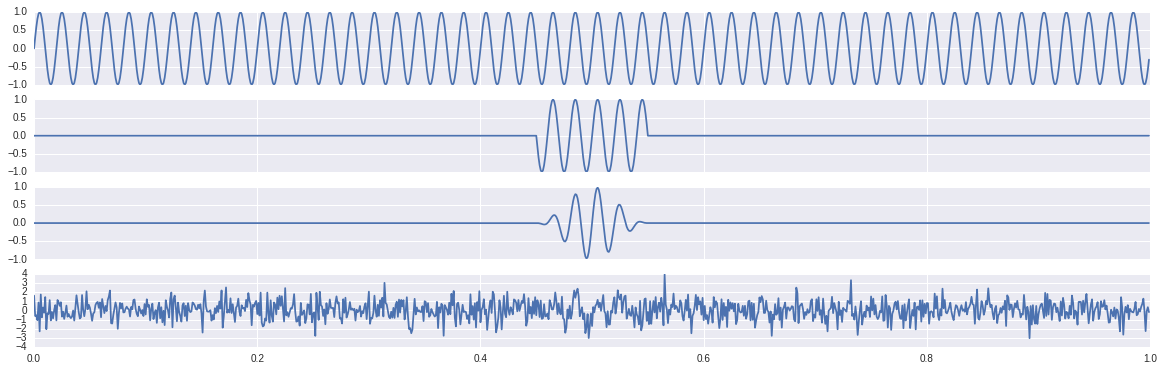

In [34]:
# create mne info object (with minimun information)
sfreq = 1000.0                     # sampling rate = 1000 msec
ch_names = ['SIM0001', 'SIM0002']  # two channels
ch_types = ['eeg', 'eeg']
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# prepare (pseudo) random noise (to add later to the signal)
n_times = int(sfreq)               # 1 second long epochs
n_epochs = 40                      # 40 epochs (signal segments)
rng = np.random.RandomState(seed=1)
noise = rng.randn(n_epochs, len(ch_names), n_times)

# Generate a 50 Hz sinusoidal signal ramp it and add the noise.
_, ax = plt.subplots(4, sharex=True)
t = np.arange(n_times, dtype=np.float) / sfreq  # equivalent to np.linespace(0,1,1000)
signal = np.sin(np.pi * 2. * 50. * t)           # FIG 1. 50 Hz sinusoid signal
ax[0].plot(t, signal)
signal[np.logical_or(t < 0.45, t > 0.55)] = 0.  # FIG 2. Set a window from 450 to 550 msec by zero-padding
ax[1].plot(t, signal)
on_time = np.logical_and(t >= 0.45, t <= 0.55)
signal[on_time] *= np.hanning(on_time.sum())    # FIG 3. Multipication with hanning window (with length=100)
ax[2].plot(t, signal);
ax[3].plot(t, noise[0,0,:]+signal)
data = noise + signal                           # FIG 4. Generate 40 epochs in the two channels with 
                                                # random noise in the same length

In [35]:
# Generating an event at the begining of each epoch
events = np.empty((n_epochs, 3), dtype=int)
first_event_sample = 100
event_id = dict(sin50hz=1)
for k in range(n_epochs):
    events[k, :] = first_event_sample + k * n_times, 0, event_id['sin50hz']
events[range(10),:]

array([[ 100,    0,    1],
       [1100,    0,    1],
       [2100,    0,    1],
       [3100,    0,    1],
       [4100,    0,    1],
       [5100,    0,    1],
       [6100,    0,    1],
       [7100,    0,    1],
       [8100,    0,    1],
       [9100,    0,    1]])

In [36]:
# Generating an epoch array instance from our data and events
epochs = mne.EpochsArray(data=data, info=info, events=events, event_id=event_id)

40 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


In [37]:
freqs = np.arange(5., 100., 3.)  # set the frequency range 

### (1) Power estimation with Multitapers
Multitapers are typically used in order to achieve better control over the frequency smoothing. 

In this method, the data are ‘tapered’ prior to calculating the power by discrete Fourier transformations . Several orthogonal tapers might be used for each time window. The power is calculated for each tapered data segment and then combined.
![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/DPSS_figure.JPG/450px-DPSS_figure.JPG)

Applying baseline correction (mode: mean)


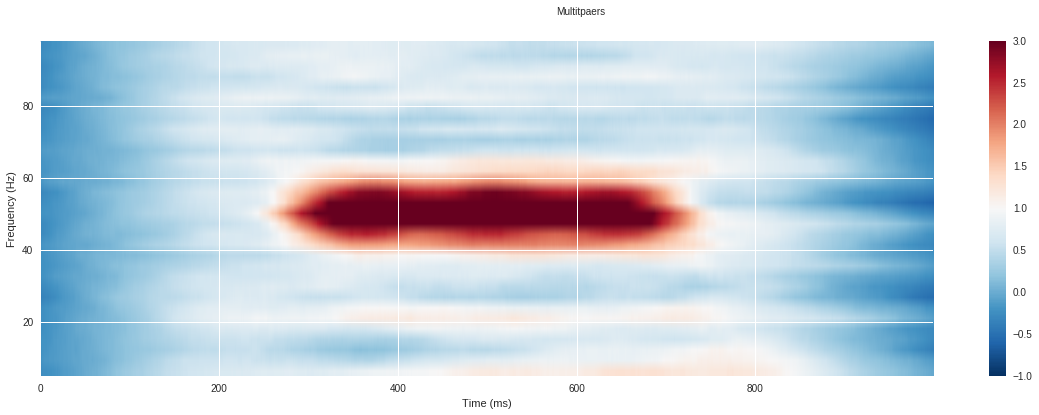

In [38]:
n_cycles = freqs / 2.             
time_bandwidth = 4.0  # 3 tapers
power = mne.time_frequency.tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles, 
                                          time_bandwidth=time_bandwidth, return_itc=False)
# Plot results. Baseline correct based on first 100 ms.
power.plot([0], baseline=(0., 0.1), mode='mean', vmin=-1., vmax=3.,
           title='Multitpaers');

### (2) Morlet Wavelets
This approach is equivalent to calculating time-frequency representations with a taper that have a gabor filter shape. The 'taper' is convolved with the filtered signal of the same frequency (this is done instead of appliying FFT).    

![](http://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/MorletWaveletMathematica.svg/440px-MorletWaveletMathematica.svg.png)

Applying baseline correction (mode: mean)


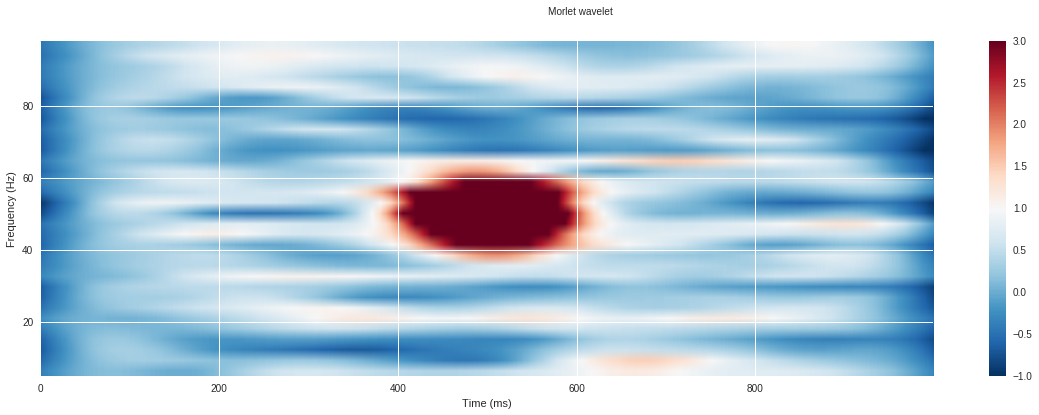

In [39]:
n_cycles = freqs / 2.
power = mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, return_itc=False)
power.plot([0], baseline=(0., 0.1), mode='mean', vmin=-1., vmax=3.,
           title='Morlet wavelet');

### Example 2 - Motor Imagery Decoding


In [53]:
## Set parameters and read data
tmin, tmax = -1., 4.             # using epochs that start 1s after cue onset to avoid evoked responses inclusion
event_id = dict(hands=2, feet=3) # give events names
subject = 1                      # take only 1 subject
runs = [6, 10, 14]               # motor imagery: hands vs feet

raw_fnames = mne.datasets.eegbci.load_data(subject, runs)
raw_files = [mne.io.read_raw_edf(f, preload=True) for f in raw_fnames]
raw = mne.io.concatenate_raws(raw_files)
raw.rename_channels(lambda x: x.strip('.'))  # strip channel names of "." characters 
                                             # equivalent to def f(x): return x.strip('.')

Extracting edf Parameters from /home/shiri/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R06.edf...
Setting channel info structure...
Creating Raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ready.
Extracting edf Parameters from /home/shiri/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R10.edf...
Setting channel info structure...
Creating Raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ready.
Extracting edf Parameters from /home/shiri/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R14.edf...
Setting channel info structure...
Creating Raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ready.


In [54]:
raw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fc5, Fc3, Fc1, Fcz, Fc2, Fc4, Fc6, C5, C3, C1
    chs : list | 65 items (EEG: 64, MISC: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    filename : unicode | /home/shir.../S001R06.edf
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 80.0 Hz
    meas_date : int | 1250093700
    nchan : int | 65
    projs : list | 0 items
    sfreq : float | 160.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : 

<IPython.core.display.Javascript object>


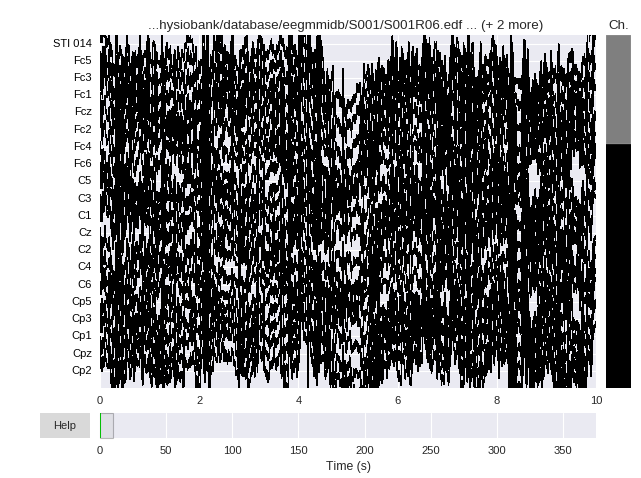

<IPython.core.display.Javascript object>


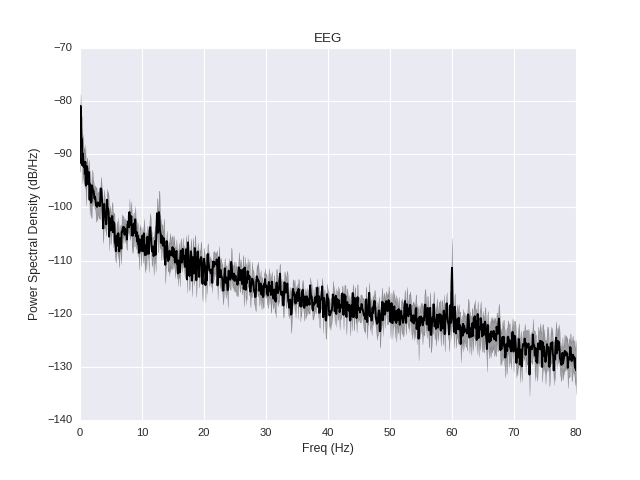

Effective window size : 12.800 (s)


<IPython.core.display.Javascript object>


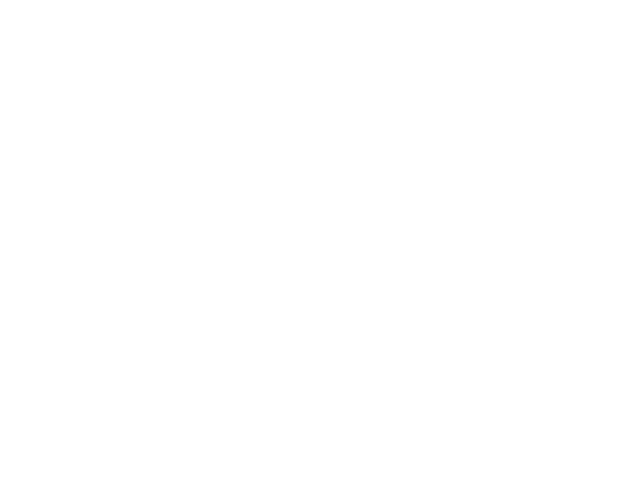

<IPython.core.display.Javascript object>


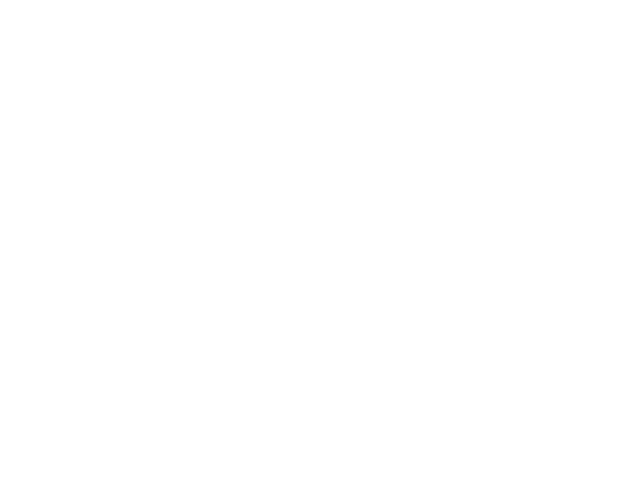

In [55]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = (8.0, 6.0)
raw.plot();
raw.plot_psd();

Band-pass filtering from 7 - 30 Hz


<IPython.core.display.Javascript object>


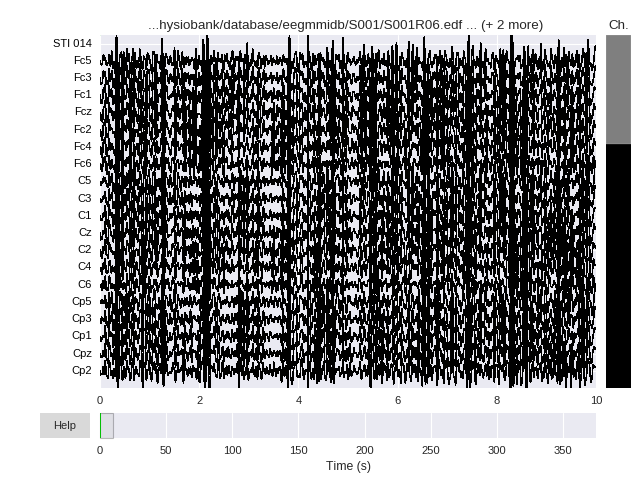

<IPython.core.display.Javascript object>


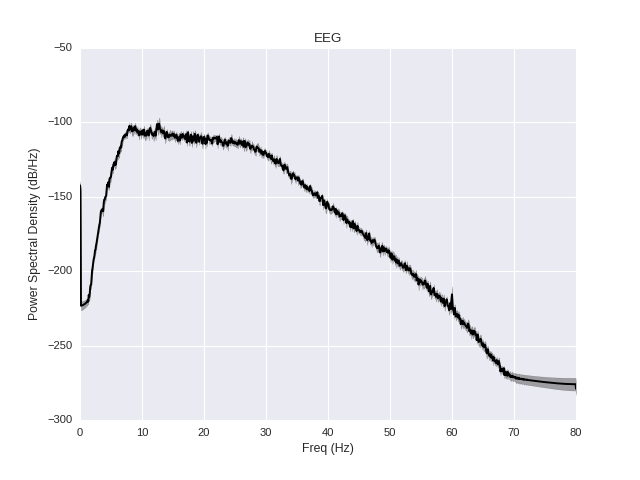

Effective window size : 12.800 (s)


In [56]:
raw.filter(7., 30., method='iir')            # apply band-pass filter
raw.plot();
raw.plot_psd();
%matplotlib inline

In [57]:
events = mne.find_events(raw, stim_channel='STI 014')
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude='bads')
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks, baseline=None, preload=True, add_eeg_ref=False)

Removing orphaned offset at the beginning of the file.
89 events found
Events id: [1 2 3]
45 matching events found
No baseline correction applied
0 projection items activated
Loading data for 45 events and 801 original time points ...
0 bad epochs dropped


### Common Spatial Patterns (CSPs)
CSP is a technique to analyze multichannel data based on recordings from two classes (conditions). CSP yields a data-driven supervised decomposition of the signal parameterized by a matrix $W \in \mathbb{R}^{CxC}$ (C being the number of channels) that projects the signal $x(t) \in \mathbb{R}^C$ lives in the surrogate sensor space, as follows:
$$x_{CSP}(t) = W^Tx(t)$$

The optimization criterion that is used to determine the CSP patterns is, in a nutshell, CSP filters maximize the variance of the spatially filtered signal under one condition while minimizing it for the other condition.

![title](http://www.frontiersin.org/files/Articles/130143/fnhum-09-00358-HTML/image_m/fnhum-09-00358-g004.jpg)

#### plot CSP patterns (weights) topography

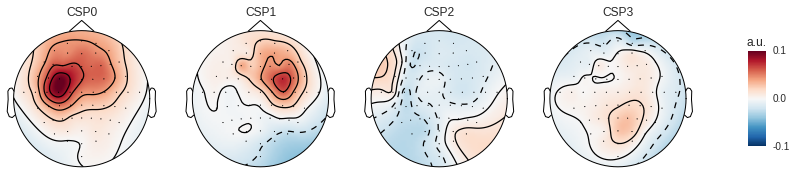

In [62]:
%matplotlib inline
epochs_data = epochs.get_data()
labels = epochs.events[:, -1] - 2 

csp = mne.decoding.CSP(n_components=4, reg=None, log=True)
csp.fit_transform(epochs_data, labels) # multiply the pattern with each epoch mean squared signal
epochs_data = epochs.get_data()
labels = epochs.events[:, -1] - 2 

layout = mne.channels.read_layout('EEG1005')
csp.plot_patterns(epochs.info, layout=layout, size=2.5);

#### Classification with SVM based on CSPs

In [48]:
from sklearn.pipeline import Pipeline  
from sklearn.cross_validation import ShuffleSplit, cross_val_score 
from sklearn.svm import SVC     

svc = SVC() 
clf = Pipeline([('CSP', csp), ('SVC', svc)])

epochs_clf = epochs.copy().crop(tmin=1., tmax=2.) # take from each epoch only the segments from 1 to 2 seconds.
epochs_clf_data = epochs_clf.get_data()

# Define a cross-validation generator:
cv = ShuffleSplit(len(labels), 10, test_size=0.2, random_state=0) # 10 sets

# the following 1 line of code:
# fit and transform the data to scp data [45 epochs (samples) * 4 CSPs (features)],
# fit and transform the scp data to svm prediction [predicted label of each sample]
# repeat this and save the score for each cross-validation set
scores = cross_val_score(clf, epochs_clf_data, labels, cv=cv, n_jobs=1) 
                                                                        

# Printing the classification results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores), class_balance))

Classification accuracy: 0.888889 / Chance level: 0.533333


#### Look at classification performance over time

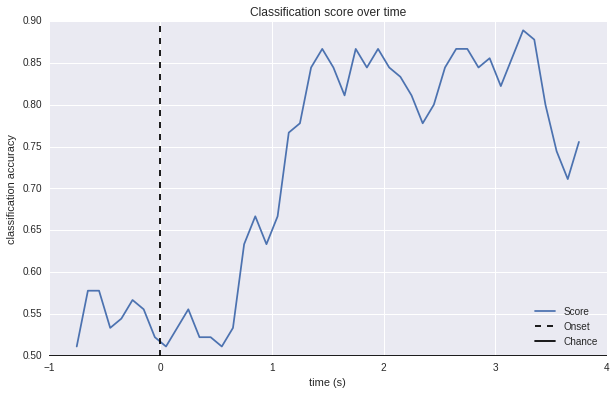

In [50]:
sfreq = raw.info['sfreq']
w_length = int(sfreq * 0.5)   # running classifier: window length
w_step = int(sfreq * 0.1)     # running classifier: window step size
w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)

scores_windows = []

for train_idx, test_idx in cv:
    y_train, y_test = labels[train_idx], labels[test_idx]

    X_train = csp.fit_transform(epochs_data[train_idx], y_train)
    X_test = csp.transform(epochs_data[test_idx])

    # fit classifier
    svc.fit(X_train, y_train)

    # running classifier: test classifier on sliding window
    score_this_window = []
    for n in w_start:
        X_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
        score_this_window.append(svc.score(X_test, y_test))
    scores_windows.append(score_this_window)

# Plot scores over time
w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin

plt.figure(figsize=(10.0, 6.0))
plt.plot(w_times, np.mean(scores_windows, 0), label='Score')
plt.axvline(0, linestyle='--', color='k', label='Onset')
plt.axhline(0.5, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Classification score over time')
plt.legend(loc='lower right')
plt.show()

#### check out the MNE gallery for many more powerful examples: http://martinos.org/mne/stable/auto_examples/index.html

# PyMVPA and NiPype for Neuroimaging
* http://www.pymvpa.org/tutorial.html - Multivariate Pattern Analysis in Python (suitable for fMRI)
* http://nipype.readthedocs.io/en/latest/ - provides a uniform interface to existing neuroimaging software and facilitates interaction between these packages within a single workflow. Nipype provides an environment that encourages interactive exploration of algorithms from different packages (e.g., ANTS, SPM, FSL, FreeSurfer, Camino, MRtrix, MNE, AFNI, Slicer)

## More useful libraries and re-sources:
* __scipy.stats__ - statistics (building and fitting distributions, hypothesis testing, multiple comparisons)
* __scipy.signal__ - filtering, time-frequency analysis 
* __http://nipy.org/__ -  community of practice devoted to the use of the Python programming language in the analysis of neuroimaging data